# Array Paradigm

## Initial Set-Up

In [1]:
import numpy as np


## Predecessor and Successor

In [2]:
def predecessor(a: int) -> int:
    return np.add(a, -1)


assert predecessor(1) == 0
assert predecessor(10) == 9


In [3]:
def successor(a: int) -> int:
    return np.add(a, 1)


assert successor(0) == 1
assert successor(10) == 11


## Addition

In [4]:
def addition(addend_1: int, addend_2: int) -> int:
    return np.add(addend_1, addend_2)


assert addition(0, 0) == 0
assert addition(1, 0) == 1
assert addition(0, 1) == 1
assert addition(10, 10) == 20


## Multiplication

In [5]:
def multiplication(multiplicand: int, multiplier: int) -> int:
    return np.multiply(multiplicand, multiplier)


assert multiplication(0, 0) == 0
assert multiplication(2, 0) == 0
assert multiplication(0, 2) == 0
assert multiplication(10, 10) == 100


## Exponentiation

In [6]:
def exponentiation(base: int, exponent: int) -> float:
    return np.power(base, exponent)


assert exponentiation(1, 0) == 1
assert exponentiation(0, 1) == 0
assert exponentiation(3, 3) == 27


## What is the particularity of the Array Paradigm?

In [7]:
from typing import List
import matplotlib.pyplot as plt
import matplotlib as mpl
import perfplot
import pandas as pd
import seaborn as sns


In [8]:
def multiplication_pure_python(
    multiplicands: List[int], multipliers: List[int]
) -> List[int]:
    return [
        multiplicand * multiplier
        for multiplicand, multiplier in zip(multiplicands, multipliers)
    ]


In [9]:
perfplot_params = dict(
    setup=lambda n: np.random.rand(2, n),
    kernels=[
        lambda x: multiplication_pure_python(x[0], x[1]),
        lambda x: multiplication(x[0], x[1]),
    ],
    labels=["Pure Python", "Numpy"],
    n_range=[2**k for k in range(1, 27)],
    xlabel="Array Size",
)

data_dicts = []
replicates = 3

for _ in range(replicates):
    out = perfplot.bench(**perfplot_params)

    for t, label in zip(out.timings_s, out.labels):
        data = {"x": out.n_range, "values": t, "label": [label] * len(out.n_range)}
        data_dicts.append(data)

df = pd.concat(pd.DataFrame.from_dict(data_ditc) for data_ditc in data_dicts)


Output()

Output()

Output()

In [10]:
relative_difference = (
    df.groupby(["x", "label"])
    .agg({"values": np.mean})
    .groupby("x")["values"]
    .transform(lambda x: x.max() / x.min())
    .reset_index()
    .drop("label", axis=1)
    .drop_duplicates()
)


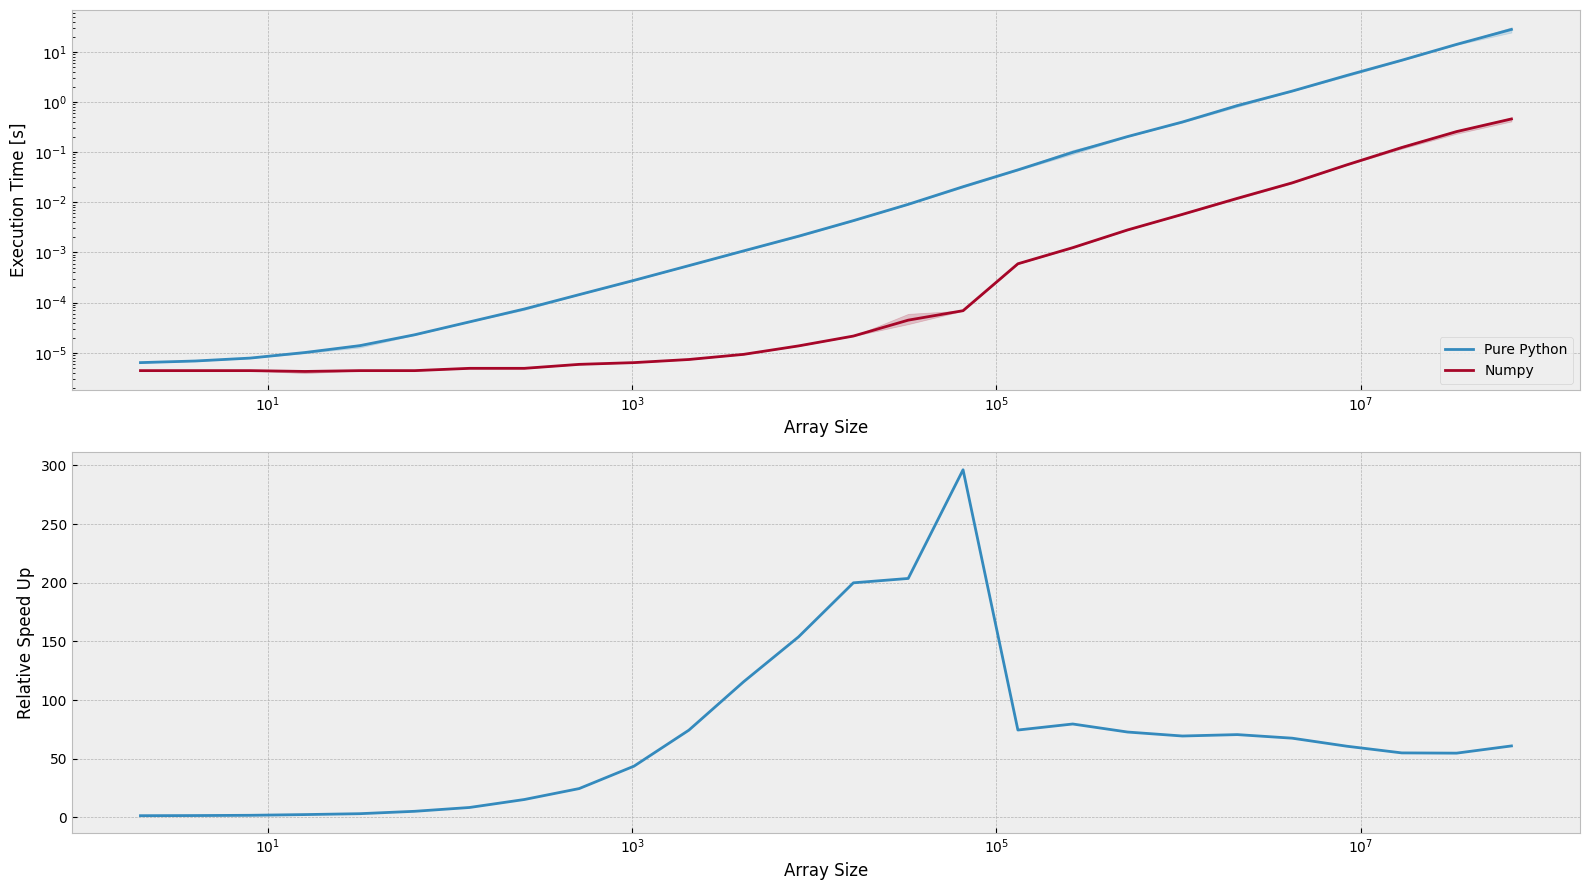

In [11]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = 16, 9

fig, axes = plt.subplots(2, 1)

ax = axes[0]
sns.lineplot(x="x", y="values", hue="label", data=df, ax=ax)

ax.set_xlabel("Array Size")
ax.set_xticks(df["x"])
ax.set_xscale("log", base=10)

ax.set_ylabel("Execution Time [s]")
ax.set_yscale("log", base=10)

ax.legend(loc="lower right")


ax = axes[1]
sns.lineplot(x="x", y="values", data=relative_difference, ax=ax)

ax.set_xlabel("Array Size")
ax.set_xticks(df["x"])
ax.set_xscale("log", base=10)

ax.set_ylabel("Relative Speed Up")

plt.tight_layout()
plt.show()
